In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(0)

## Make Dataset

In [2]:
numberOfData = 30
# Dataset Positive
datasetPositive_X = np.random.randn(2,numberOfData) * 50
datasetPositive_Y = np.ones((1, datasetPositive_X.shape[1]))

# Dataset Negative 
numberOfData = 30
radius = np.random.randn(1, numberOfData) * 40 + 600
theta = np.random.uniform(0, 360,(1, numberOfData))
x = radius*np.cos(theta)
y = radius*np.sin(theta)
datasetNegative_X = np.array([x[0], y[0]])
datasetNegative_Y = np.zeros((1, datasetNegative_X.shape[1]))

In [3]:
datasetAll_X = np.concatenate((datasetPositive_X, datasetNegative_X), axis=1)
print ("Shape Dataset Input(X):", datasetAll_X.shape)

datasetAll_Y = np.concatenate((datasetPositive_Y, datasetNegative_Y), axis=1)
print ("Shape Dataset Label(Y):", datasetAll_Y.shape)
print ('I have m = %d training examples!' % (datasetAll_Y.shape[1]))

Shape Dataset Input(X): (2, 60)
Shape Dataset Label(Y): (1, 60)
I have m = 60 training examples!


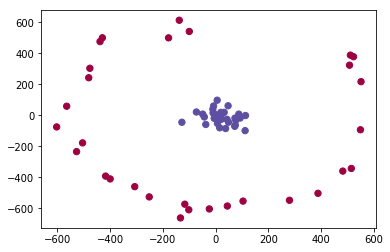

In [4]:
# Visualize the data:
plt.scatter(datasetAll_X[0, :], datasetAll_X[1, :], c=datasetAll_Y.flatten(), s=40, cmap=plt.cm.Spectral);

## NN

In [5]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [6]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [7]:
def ReLU(x):
    return x * (x > 0)
# data = np.array([1, 2, -3])
# ReLU(data)

In [8]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
#     print("forward_propagation X:", X.shape)
#     print("forward_propagation W1:", W1.shape)
#     print("forward_propagation Z1:", Z1.shape)
    A1 = ReLU(Z1)
#     print("forward_propagation ReLU:", A1.shape)
    Z2 = np.dot(W2, A1) + b2
#     print("forward_propagation W2:", W2.shape)
#     print("forward_propagation Z2:", Z2.shape)
    A2 = sigmoid(Z2)
    
#     print(A2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [9]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
#     print(A2)
    # Retrieve W1 and W2 from parameters
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    
    return cost

In [10]:
# GRADED FUNCTION: backward_propagation
def d_relu(z):
    z[z>0]=1
    z[z<=0]=0
    return z

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
#     dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(d_relu(Z1)))
    dW1 = 1/m*(np.dot(dZ1,X.T))
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [11]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [13]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = 1*(A2>0.5)
    ### END CODE HERE ###
    
    return predictions

In [14]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations=10000, lr=0.03, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    print("n_x", n_x)
    print("n_y", n_y)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        
        parameters = update_parameters(parameters,grads, lr)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [15]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(datasetAll_X, datasetAll_Y, n_h = 10, num_iterations=8000, lr=0.01, print_cost=True)

n_x 2
n_y 1
Cost after iteration 0: 0.667672
Cost after iteration 1000: 0.160778
Cost after iteration 2000: 0.089949
Cost after iteration 3000: 0.061099
Cost after iteration 4000: 0.045594
Cost after iteration 5000: 0.035084
Cost after iteration 6000: 0.028739
Cost after iteration 7000: 0.024221


In [16]:
# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0,                                                                                   :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    
plot_decision_boundary(lambda x: predict(parameters, x.T), datasetAll_X, datasetAll_Y.flatten())
plt.title("Decision Boundary for hidden layer size " + str(4))

Text(0.5,1,'Decision Boundary for hidden layer size 4')

In [20]:
predict(parameters, x.T)

ValueError: shapes (10,2) and (30,1) not aligned: 2 (dim 1) != 30 (dim 0)